Projeção economica


Cenários:
    
Otimisa = (expansão) - Prob 20% = Receita sobe 30% = Lucro 2m

Base = (analista - peso maior) - Prob 50% = Receita fica 0% = Lucro de 1.8m

Pessimista = (regressão da economia) - Prob 30% = Receita cai 20% = Lucro 1,2m

Lei dos grandes numeros ?


Estatistaca (Distribuição de probabiliadde (dis normal)

Probabilidade ex: Lucro


(Media aritimetica ponderada)

2 * 20% 

1.8 * 50% 

3 * 30%

Media ponderada = 1.66m


# Configurando ambiente

In [1]:
import sys
#!pip install xgboost


In [2]:
def calculaWacc(array_parametros):
    dados = array_parametros;
    
    soma = ((dados['capitalProprio'] * dados['ks']) + (dados['capitalTerceiro'] * dados['kd']))
    
    return (soma / (dados['capitalTerceiro'] + dados['capitalProprio']))

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor



pd.set_option('display.max_columns', None) #display all columns
pd.set_option('display.max_rows', None) #display all rows

# Preparando os dados

In [4]:

custosAnuais = [
    {"ano":1, "valor": 487716},
    {"ano":2, "valor": 547716},
    {"ano":3, "valor": 607716},
];

produtos = [
    {
        "mix": 0.14,
        "custo":1.26,
        "preco":4.9,
        "ano":0,
        "mcu": 3.64,
        "nome": "Pastel Grande",
        "rateio": 0,
        "pde": 0,
        "quantidade":30000,
        "receita":0,
    },
    {
        "mix": 0.14,
        "custo":0.81,
        "preco":3.8,
        "ano":0,
        "mcu": 2.99,
        "nome": "Pastel Medio",
        "rateio": 0,
        "pde": 0,
        "quantidade":38000,
        "receita":0,
    },
    {
        "mix": 0.24,
        "custo":0.26,
        "preco":1.5,
        "ano":0,
        "mcu": 1.24,
        "nome": "Mini Pastel",
        "rateio": 0,
        "pde": 0,
        "quantidade":110000,
        "receita":0,
    },
    {
        "mix": 0.14,
        "custo":1.84,
        "preco":6.1,
        "ano":0,
        "mcu": 4.26,
        "nome": "Cheeseburguers",
        "rateio": 0,
        "pde": 0,
        "quantidade":18000,
        "receita":0,
    },
    {
        "mix": 0.10,
        "custo":4.68,
        "preco":11.38,
        "ano":0,
        "mcu": 6.7,
        "nome": "Cestaas",
        "rateio": 0,
        "pde": 0,
        "quantidade":8964,
        "receita":0,
    },
    {
        "mix": 0.10,
        "custo":4.99,
        "preco":7.95,
        "ano":0,
        "mcu": 2.96,
        "nome": "Minutas",
        "rateio": 0,
        "pde": 0,
        "quantidade":18000,
        "receita":0,
    },
    {
        "mix": 0.14,
        "custo":2.6,
        "preco":3.6,
        "ano":0,
        "mcu": 1,
        "nome": "Bebidas",
        "rateio": 0,
        "pde": 0,
        "quantidade":67000,
        "receita":0,
    }
];

In [5]:
a = []

for anoCusto in custosAnuais:
    for produto in produtos:
        produto["rateio"] = anoCusto["valor"] * produto["mix"]
        produto["pde"] = produto["rateio"] / produto["mcu"]
        produto["ano"] = anoCusto["ano"]
    
        a.append({
            "nome": produto["nome"],
            "mix": produto["mix"],
            "ano":produto["ano"],
            "mcu": produto["mcu"],
            "custo": produto["custo"] * produto["quantidade"],
            "preco": produto["preco"],
            "rateio": produto["rateio"],
            "pde": produto["pde"],
            "receita": produto["preco"] * produto["quantidade"]
        })        


In [6]:
dataSet = pd.DataFrame(list(a), columns=["nome", "mix", "mcu", "custo", "preco","ano", "rateio", "pde", "receita"])

# Tabelas Ponto de Equilibrio

## Opção 1

In [7]:
ano = dataSet[dataSet["ano"] == 1]

ano

,nome,mix,mcu,custo,preco,ano,rateio,pde,receita
0,Pastel Grande,0.14,3.64,37800.00,4.90,1,68280.24,18758.307692,147000.00
1,Pastel Medio,0.14,2.99,30780.00,3.80,1,68280.24,22836.200669,144400.00
2,Mini Pastel,0.24,1.24,28600.00,1.50,1,117051.84,94396.645161,165000.00
3,Cheeseburguers,0.14,4.26,33120.00,6.10,1,68280.24,16028.225352,109800.00
4,Cestaas,0.10,6.70,41951.52,11.38,1,48771.60,7279.343284,102010.32
5,Minutas,0.10,2.96,89820.00,7.95,1,48771.60,16476.891892,143100.00
6,Bebidas,0.14,1.00,174200.00,3.60,1,68280.24,68280.240000,241200.00


## Opção 2

In [8]:
ano = dataSet[dataSet["ano"] == 2]

ano

,nome,mix,mcu,custo,preco,ano,rateio,pde,receita
7,Pastel Grande,0.14,3.64,37800.00,4.90,2,76680.24,21066.000000,147000.00
8,Pastel Medio,0.14,2.99,30780.00,3.80,2,76680.24,25645.565217,144400.00
9,Mini Pastel,0.24,1.24,28600.00,1.50,2,131451.84,106009.548387,165000.00
10,Cheeseburguers,0.14,4.26,33120.00,6.10,2,76680.24,18000.056338,109800.00
11,Cestaas,0.10,6.70,41951.52,11.38,2,54771.60,8174.865672,102010.32
12,Minutas,0.10,2.96,89820.00,7.95,2,54771.60,18503.918919,143100.00
13,Bebidas,0.14,1.00,174200.00,3.60,2,76680.24,76680.240000,241200.00


## Opção 3

In [9]:
ano = dataSet[dataSet["ano"] == 3]

ano

,nome,mix,mcu,custo,preco,ano,rateio,pde,receita
14,Pastel Grande,0.14,3.64,37800.00,4.90,3,85080.24,23373.692308,147000.00
15,Pastel Medio,0.14,2.99,30780.00,3.80,3,85080.24,28454.929766,144400.00
16,Mini Pastel,0.24,1.24,28600.00,1.50,3,145851.84,117622.451613,165000.00
17,Cheeseburguers,0.14,4.26,33120.00,6.10,3,85080.24,19971.887324,109800.00
18,Cestaas,0.10,6.70,41951.52,11.38,3,60771.60,9070.388060,102010.32
19,Minutas,0.10,2.96,89820.00,7.95,3,60771.60,20530.945946,143100.00
20,Bebidas,0.14,1.00,174200.00,3.60,3,85080.24,85080.240000,241200.00


# Receitas e custos

In [10]:

receita = ano["receita"].sum()
custo = ano["custo"].sum()

print 'receita:', receita
print 'custo:', custo


receita: 1052510.32
custo: 436271.52


# Calculando Capital

In [11]:
custo = 200

capitalProprio = 200 * 0.40
ks = 0.15

capitalTerceiro = 200 * 0.60
kd = 0.10

print "Capital Proprio ", capitalProprio

print "Capital Terceiro ", capitalTerceiro

Capital Proprio  80.0
Capital Terceiro  120.0


# WACC

In [12]:
dadosWacc = {
    "capitalTerceiro": capitalProprio,
    "kd": kd,
    "capitalProprio":capitalTerceiro,
    "ks": ks
}

WACC = calculaWacc(dadosWacc)

print "CMPC - ",WACC * 100, "%"

CMPC -  13.0 %


# Probabilidade

In [28]:
# Probabilidade

dfVpl = pd.DataFrame({
    'prob': [25, 40, 35],
    'vpl': [382112.90, 134676.20, -112761.50]
});

dfVplPonderados = dfVpl["vpl"] * (dfVpl["prob"] / 100)

# Lista 
dfVplPonderados.head()

0    95528.225
1    53870.480
2   -39466.525
dtype: float64

In [29]:
dfVplPonderados.describe()

count        3.000000
mean     36644.060000
std      69126.389978
min     -39466.525000
25%       7201.977500
50%      53870.480000
75%      74699.352500
max      95528.225000
dtype: float64

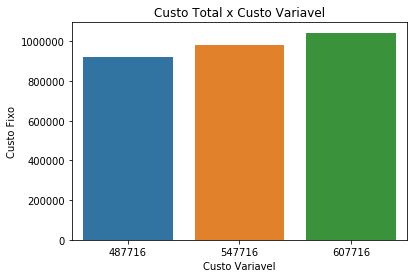

In [36]:
df1 = pd.DataFrame({
    'opcoes': ['Opção 1','Opção 2', 'Opção 3'],
    'vpl': [382112.90, 134676.20, -112761.50],
    'aluguel': [120000, 180000, 240000],
    'prob': [25, 40, 35],
    'receita': [1052510.32, 1052510.32, 1052510.32],
    'cVariavel': [487716, 547716, 607716],
    'cTotal': [923987.52, 983987, 1043987.2],
})


p = sns.barplot(data = df1, x = 'cVariavel', y = 'cTotal')
p.set(xlabel = "Custo Variavel", ylabel = "Custo Fixo")
plt.title("Custo Total x Custo Variavel");